In [16]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [17]:
class QuardticState(TypedDict):
    """State structure of quardtic equtaion"""
    a: int
    b: int
    c: int

    equation: str
    discriminant: float
    roots: str

In [23]:
def show_equation(state: QuardticState):
    """create the quardtic equation for given a , b, c"""
    equation = f'{state["a"]}x^2 + {state["b"]}x + {state["c"]} = 0'
    return {'equation': equation}

def calculate_discriminant(state: QuardticState):
    """calculate the discriminant of the quardtic equation"""
    a, b, c = state['a'], state['b'], state['c']
    discriminant = b**2 - 4*a*c
    return {'discriminant': discriminant}

def real_roots(state: QuardticState):
    """calculate the real roots of the quardtic equation"""
    a, b, c = state['a'], state['b'], state['c']
    discriminant = state['discriminant']
    root1 = (-b + discriminant**0.5) / (2*a)
    root2 = (-b - discriminant**0.5) / (2*a)
    result = f'Root1: {root1}, Root2: {root2}'
    return {'roots': result}

def repeated_root(state: QuardticState):
    """calculate the repeated root of the quardtic equation"""
    a, b = state['a'], state['b']
    root = -b / (2*a)
    result = f'Repeated Root: {root}'
    return {'roots': result}

def complex_roots(state: QuardticState):
    """calculate the complex roots of the quardtic equation"""
    a, b, c = state['a'], state['b'], state['c']
    discriminant = state['discriminant']
    real_part = -b / (2*a)
    imaginary_part = (-discriminant)**0.5 / (2*a)
    root1 = f'{real_part} + {imaginary_part}i'
    root2 = f'{real_part} - {imaginary_part}i'
    result = f'Root1: {root1}, Root2: {root2}'
    return {'roots': result}

In [19]:
def check_condition(state: QuardticState) -> Literal['real_roots', 'repeated_root', 'complex_roots']:
    """Check the condition based on the discriminant value"""
    discriminant = state['discriminant']

    if discriminant > 0:
        return 'real_roots'
    elif discriminant == 0:
        return 'repeated_root'
    else: return 'complex_roots'

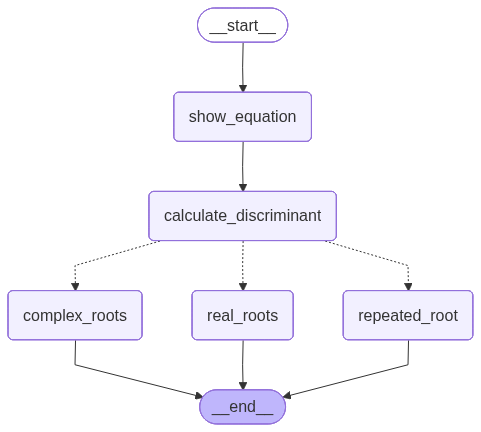

In [20]:
graph = StateGraph(QuardticState)

# add node
graph.add_node('show_equation', show_equation)
graph.add_node('calculate_discriminant', calculate_discriminant)
graph.add_node('real_roots', real_roots)
graph.add_node('repeated_root', repeated_root)
graph.add_node('complex_roots', complex_roots)

# add edges
graph.add_edge(START, 'show_equation')
graph.add_edge('show_equation', 'calculate_discriminant')
graph.add_conditional_edges('calculate_discriminant', check_condition)
graph.add_edge('real_roots', END)
graph.add_edge('repeated_root', END)
graph.add_edge('complex_roots', END)

app = graph.compile()
app

In [24]:
res = app.invoke({'a': 1, 'b': -3, 'c': 2})

In [25]:
print(res)

{'a': 1, 'b': -3, 'c': 2, 'equation': '1x2-3x2', 'discriminant': 1, 'roots': 'Root1: 2.0, Root2: 1.0'}
